# 분류문제: 
- LMS에서의 학습태도를 이용한 학생 성적등급 예측
- y값: Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)


    

In [180]:
import warnings
warnings.filterwarnings(action = 'ignore')

### [문제1] 아래의 사이트를 참조하여 각 필드 설명

- 데이터셋: https://www.kaggle.com/aljarah/xAPI-Edu-Data
- [문제1-1] 아래의 변수 간략히 설명
    - gender: 성별 (Male, Female)
    - NationaliTy: 국적 (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’, ’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
    - PlaceofBirth: 출생지 (NationliTy와 같은 데이터)
    - StageID: 학생이 속한 학습 레벨 (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
    - GradeID: 학생이 속한 등급 (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)
    - SectionID: 학생이 속한 학급 (nominal:’A’,’B’,’C’)
    - Topic: 학습 주제 (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)
    - Semester: 학기 (nominal:’ First’,’ Second’)
    - Relation: 학부모 (nominal:’mom’,’father’)
    - raisedhands: 학생이 학급에서 질문을 한 횟수 (numeric:0-100)
    - VisITedResources: 출석 횟수 (numeric:0-100)
    - AnnouncementsView: 학생들의 새로운 공지사항 확인 횟수
    - Discussion: 토론 횟수 (numeric:0-100)
    - ParentAnsweringSurvey: 학부모 설문 참여 여부 (nominal:’Yes’,’No’)
    - ParentschoolSatisfaction: 학교에 대한 학부모 만족도 (nominal:’Yes’,’No’)
    - StudentAbscenceDays: 결석일 (nominal: 7 이상, 7 이하)
    - Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)      
    
- [문제1-2] xAPI-Edu-Data 데이터의 전반적 설명



## [문제2] 데이터셋 준비 및 기초통계분석


### [문제2-1] 판다스에서  read_csv 로 한글 읽을때 발생하는 encoding에 대하여 정리


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('xAPI-Edu-Data.csv')

In [153]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

### [문제2-2] df 자료의 무작위 번호 10개 출력(480개의 행중 무작위로 10개 데이터 출력)
- 방법1) 판다스의 샘플 데이터 출력 이용
- 방법2) 직접 rand함수를 이용하여 샘플 번호 출력

In [154]:
### 문제2-2의 방법1
df.sample(10)

gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
456      F      Jordan       Jordan  MiddleSchool    G-08         A   
330      M      Jordan       Jordan    lowerlevel    G-02         A   
257      F          KW       KuwaIT    lowerlevel    G-04         A   
417      M        Iraq         Iraq  MiddleSchool    G-07         B   
410      F      Jordan       Jordan  MiddleSchool    G-07         B   
14       F          KW       KuwaIT  MiddleSchool    G-08         A   
92       F          KW       KuwaIT    lowerlevel    G-02         B   
169      M          KW       KuwaIT    lowerlevel    G-02         B   
97       F          KW       KuwaIT    lowerlevel    G-02         B   
121      M          KW       KuwaIT    lowerlevel    G-02         C   

         Topic Semester Relation  raisedhands  VisITedResources  \
456  Chemistry        F   Father           85                90   
330     French        F   Father           40                 7   
257    History        S   Father           70                99   
417    Biology        S   Father           89                92   
410    Biology        F      Mum           70                89   
14        Math        F      Mum           62                70   
92          IT        F   Father           50                70   
169     French        S      Mum           30                12   
97          IT        F   Father            6                 2   
121         IT        F      Mum            0                 4   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
456                 52          30                   Yes   
330                 50          41                    No   
257                 66          65                    No   
417                 89          83                   Yes   
410                 12          21                    No   
14                  44          60                    No   
92                  19          15                   Yes   
169                 29          23                    No   
97                  38          12                    No   
121                  8          30                    No   

    ParentschoolSatisfaction StudentAbsenceDays Class  
456                     Good            Under-7     H  
330                     Good            Above-7     L  
257                     Good            Under-7     M  
417                     Good            Under-7     H  
410                     Good            Under-7     H  
14                       Bad            Above-7     H  
92                      Good            Under-7     H  
169                      Bad            Under-7     M  
97                       Bad            Under-7     M  
121                      Bad            Above-7     L

In [155]:
### 문제2-2의 방법2
num = [int(np.random.rand()*480) for _ in range(10)]
df.iloc[num,:]

gender NationalITy PlaceofBirth       StageID GradeID SectionID    Topic  \
399      M   Palestine    Palestine  MiddleSchool    G-07         A  Biology   
336      F   Palestine       Jordan    lowerlevel    G-02         A   French   
201      F     lebanon      lebanon  MiddleSchool    G-08         A   Arabic   
246      F          KW       KuwaIT  MiddleSchool    G-06         A  Science   
297      F      Jordan       Jordan    lowerlevel    G-04         A  Science   
299      M      Jordan       Jordan    lowerlevel    G-04         A  Science   
371      M      Jordan       Jordan    lowerlevel    G-02         A   Arabic   
261      M          KW       KuwaIT    lowerlevel    G-04         A  History   
209      M          KW       KuwaIT  MiddleSchool    G-08         C  Spanish   
259      M          KW       KuwaIT    lowerlevel    G-04         A  English   

    Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
399        S   Father           89                92                 89   
336        F      Mum           70                90                 20   
201        S      Mum           45                58                 52   
246        S   Father           80                94                 62   
297        S      Mum           72                74                 82   
299        S   Father           32                14                 32   
371        S   Father           35                 2                 29   
261        S   Father           61                97                 82   
209        S   Father           70                81                 39   
259        S      Mum           69                34                 12   

     Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
399          83                   Yes                     Good   
336          21                    No                     Good   
201          43                   Yes                     Good   
246          77                   Yes                     Good   
297          89                    No                     Good   
299          29                    No                     Good   
371          23                    No                      Bad   
261          64                   Yes                      Bad   
209          84                    No                      Bad   
259          17                    No                      Bad   

    StudentAbsenceDays Class  
399            Under-7     H  
336            Under-7     M  
201            Under-7     H  
246            Under-7     H  
297            Under-7     H  
299            Above-7     M  
371            Under-7     M  
261            Above-7     M  
209            Under-7     M  
259            Above-7     L

### [문제2-3] df.info 의 type의 이해

- [문제2-3-1] df의 타입중  object형만 출력
    - 구글검색해서 해보세요..
    - 출력결과는 gender, nationallTy, PlaceofBirth, StageId 등 object형의  컬럼명만 출력되면 됨
- [문제2-3-3] 판다스의 type중  object와 category 의 차이점에 대하여 조사


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [157]:
##  [문제2-3-1] df의 타입중  object형만 출력
df.loc[:, df.dtypes == 'object']

gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation ParentAnsweringSurvey  \
0           IT        F   Father                   Yes   
1           IT        F   Father                   Yes   
2           IT        F   Father                    No   
3           IT        F   Father                    No   
4           IT        F   Father                    No   
..         ...      ...      ...                   ...   
475  Chemistry        S   Father                    No   
476    Geology        F   Father                    No   
477    Geology        S   Father                    No   
478    History        F   Father                    No   
479    History        S   Father                    No   

    ParentschoolSatisfaction StudentAbsenceDays Class  
0                       Good            Under-7     M  
1                       Good            Under-7     M  
2                        Bad            Above-7     L  
3                        Bad            Above-7     L  
4                        Bad            Above-7     M  
..                       ...                ...   ...  
475                      Bad            Above-7     L  
476                      Bad            Under-7     M  
477                      Bad            Under-7     M  
478                      Bad            Above-7     L  
479                      Bad            Above-7     L  

[480 rows x 13 columns]

In [158]:
## [문제2-3-3] 판다스의 type중  object와 category 의 차이점에 대하여 조사
# object 타입
# 판다스의 문자열 타입
# category 타입
# 가능한 값들의 범위가 고정되어 있고 한정적일 때 사용한다.

In [159]:
df.describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000

### [문제2-4] object형의 데이터 카운트 및 비율 확인
- 카운트와 %를 출력 (gender' / 'NationallTy' 등 object 형만 작업) 
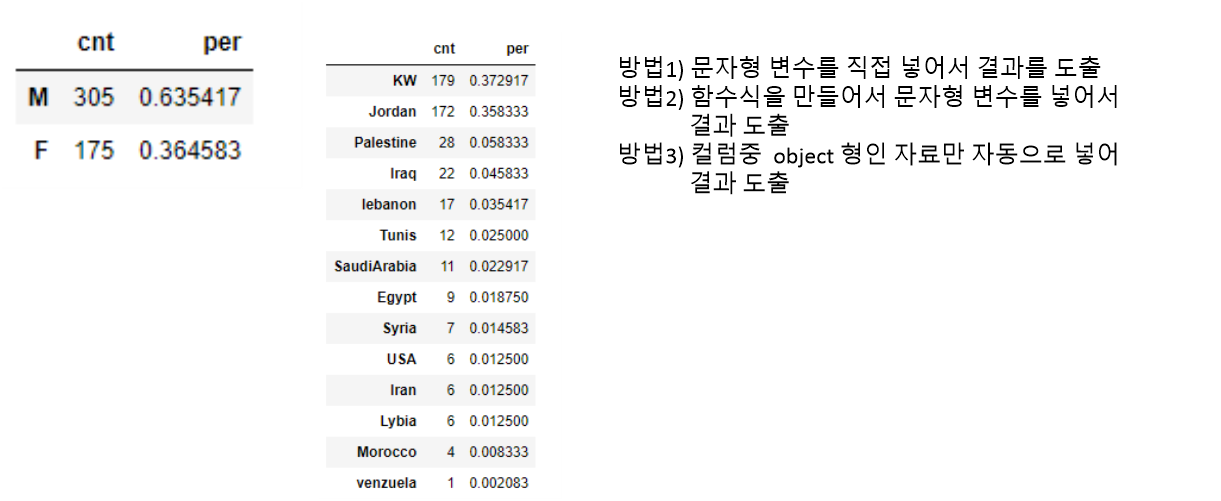

In [160]:
for i in df.loc[:, df.dtypes == 'object']:
    print('-'*20 + i + '-'*20)
    a = df[i].value_counts().values
    tmp = pd.DataFrame({'cnt':a, 'per':a/480}, index=df[i].unique())
    print(tmp)

--------------------gender--------------------
   cnt       per
M  305  0.635417
F  175  0.364583
--------------------NationalITy--------------------
             cnt       per
KW           179  0.372917
lebanon      172  0.358333
Egypt         28  0.058333
SaudiArabia   22  0.045833
USA           17  0.035417
Jordan        12  0.025000
venzuela      11  0.022917
Iran           9  0.018750
Tunis          7  0.014583
Morocco        6  0.012500
Syria          6  0.012500
Palestine      6  0.012500
Iraq           4  0.008333
Lybia          1  0.002083
--------------------PlaceofBirth--------------------
             cnt       per
KuwaIT       180  0.375000
lebanon      176  0.366667
Egypt         22  0.045833
SaudiArabia   19  0.039583
USA           16  0.033333
Jordan        16  0.033333
venzuela      10  0.020833
Iran           9  0.018750
Tunis          9  0.018750
Morocco        6  0.012500
Syria          6  0.012500
Iraq           6  0.012500
Palestine      4  0.008333
Lybia         

## [문제3] 수치형 자료 히스토그램 그리기
- # seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

<AxesSubplot:xlabel='raisedhands', ylabel='Count'>

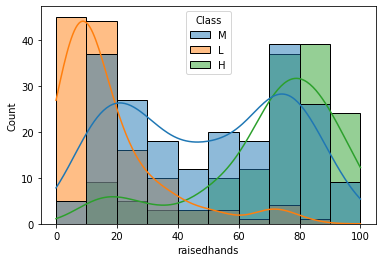

In [161]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

sns.histplot(df, x = 'raisedhands', hue = 'Class', kde=True)
# 성적 등급이 낮은 학생들의 질문 횟수가 가장 낮고
# 중위권 성적의 학생들은 질문의 횟수가 평균적이고
# 상위권 성적의 학생들의 질문 횟수가 가장 많아.
# 질문을 많이 하는 학생일수록 성적이 높을 확률이 높다.

<AxesSubplot:xlabel='VisITedResources', ylabel='Count'>

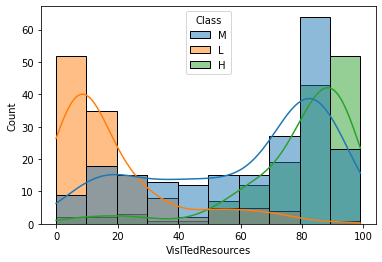

In [162]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.histplot(df, x = 'VisITedResources', hue='Class', kde=True)
# 성적이 높은 학생일수록 수업 참여율이 높고 성적이 낮은 학생일수록 수업 참여율이 낮다.
# 수업에 참여율과 성적은 서로 비례하는듯하다.

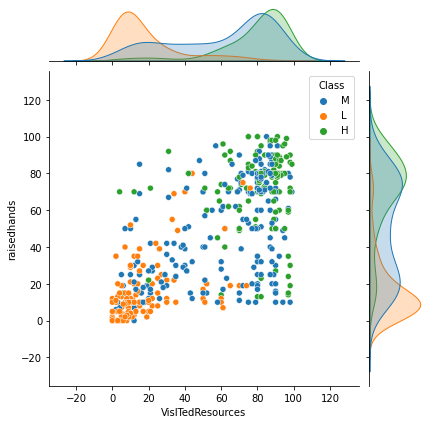

In [163]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.jointplot(data = df, x = 'VisITedResources', y = 'raisedhands', hue = 'Class')
# 성적이 좋은 학생들은 대부분 수업 참여율과 질문 횟수가 가장 높고 
# 성적이 중위권인 학생들은 평균적인 분포를 띄고 있으며
# 성적이 낮은 학생은 수업 참여율도 질문 횟수도 모두 낮다.
# 수업을 많이 참여하고, 질문을 많이 할수록 성적또한 높아질 수 있다.

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Count'>

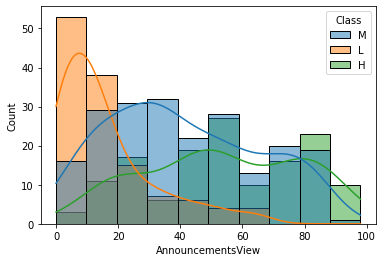

In [164]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.histplot(df, x = 'AnnouncementsView', hue = 'Class', kde = True)
# 성적이 낮은 학생들은 새로운 공지를 확인하는 횟수가 가장 적고
# 중위권 성적의 학생들이 상위권 성적의 학생들보다 공지 확인 횟수가 조금 더 높았다.
# 새로운 공지를 확인한 횟수와 성적에는 크게 상관이 없는것 같다.

<AxesSubplot:xlabel='Discussion', ylabel='Count'>

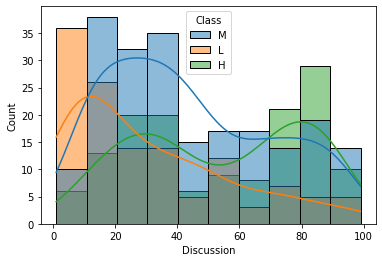

In [165]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

# 토론에 참여하는 학생들의 그룹이 거의 비슷하여 토론 활동과 성적에 큰 상관이 없는 것 같다.
# 상위권 성적의 학생들의 분포를 보았을 때 굳이 토론에 참여하지 않고 개인 공부 스타일에 맞게 공부를 진행하는듯 하다.
sns.histplot(df, x = 'Discussion', hue = 'Class', kde = True)

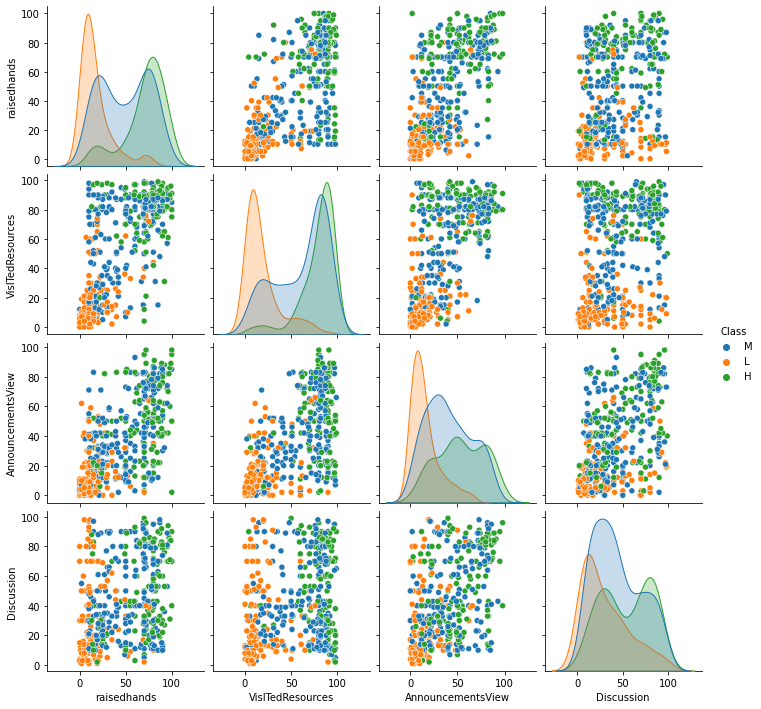

In [166]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

# 전체적인 데이터를 보았을 때 성적이 하위권인 학생들은 모든 활동의 참여율이 떨어지는 것을 알 수 있다.
# 상위권 성적의 학생들은 토론과 공지 확인 분야를 제외한 모든 분야에서 높은 참여율을 보여주었으며, 
# 이는 수업에 매번 참여하여 새로운 지식을 습득하고 질문을 통해 자신의 부족함을 보충하여 높은 성적을 거둔것으로 보이며,
# 상위권 학생에 대한 별도의 솔루션 없이 자율적인 학습을 진행하도록 두어도 무방할 것 같다.
# 중위권 학생의 경우, 모든 분야에서 균등한 분포를 보이고 있으나 크게 2가지로 나눌 수 있다.
# 학습 활동 참여율이 낮은 학생군(A)과 참여율이 높은 학생군(B)으로 나눌 수 있는데, 
# A학생군의 경우 하위권 학생들과 함께 학습 참여율을 높이는 방안을 제시하고, A학생군과 하위권 성적의 학생들의 학습 참여율이
# 높아졌을 때 성적 조사를 한번 더 진행하여 추후의 결과를 확인할 필요가 있다.
# 문제는 B학생군인데, 학습 참여율이 높음에도 불구하고 성적이 오르지 않는 이유를 분석하여 피드백을 줄 필요가 있다.
sns.pairplot(df, hue='Class')

### 문제4) Y값의  Class 컬럼을 수치로 바꾸어 표현하기

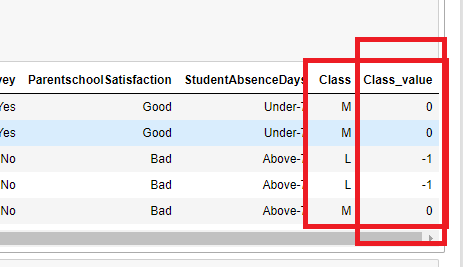

In [227]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용
# 파이썬 Map함수를 이용하여 작업
df['Class_value'] = df['Class'].map({'L':-1, 'M':0, 'H':1})
df

gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F   Father           15                16   
1           IT        F   Father           20                20   
2           IT        F   Father           10                 7   
3           IT        F   Father           30                25   
4           IT        F   Father           40                50   
..         ...      ...      ...          ...               ...   
475  Chemistry        S   Father            5                 4   
476    Geology        F   Father           50                77   
477    Geology        S   Father           55                74   
478    History        F   Father           30                17   
479    History        S   Father           35                14   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
0                    2          20                   Yes   
1                    3          25                   Yes   
2                    0          30                    No   
3                    5          35                    No   
4                   12          50                    No   
..                 ...         ...                   ...   
475                  5           8                    No   
476                 14          28                    No   
477                 25          29                    No   
478                 14          57                    No   
479                 23          62                    No   

    ParentschoolSatisfaction StudentAbsenceDays Class  Class_value  
0                       Good            Under-7     M            0  
1                       Good            Under-7     M            0  
2                        Bad            Above-7     L           -1  
3                        Bad            Above-7     L           -1  
4                        Bad            Above-7     M            0  
..                       ...                ...   ...          ...  
475                      Bad            Above-7     L           -1  
476                      Bad            Under-7     M            0  
477                      Bad            Under-7     M            0  
478                      Bad            Above-7     L           -1  
479                      Bad            Above-7     L           -1  

[480 rows x 18 columns]

<BarContainer object of 2 artists>

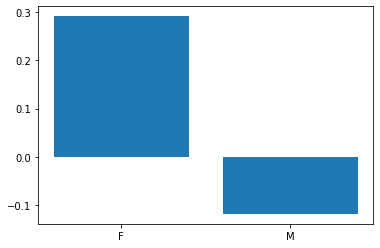

In [168]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석

# 성별대비 성적 등급의 평균을 도식화 한 것으로
# 여성이 남성보다 성적이 더 높은 것을 알 수 있다.
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

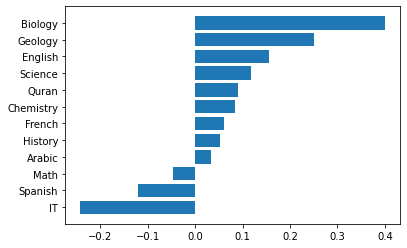

In [169]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석

# 각 과목대비 성적 등급의 평균을 도식화한 것으로
# 생물학의 성적이 가장 높고, IT의 성적이 가장 높은 것을 알 수 있다.
gb = df.groupby('Topic').mean()['Class_value']
gb = gb.sort_values()
plt.barh(gb.index, gb)

<BarContainer object of 2 artists>

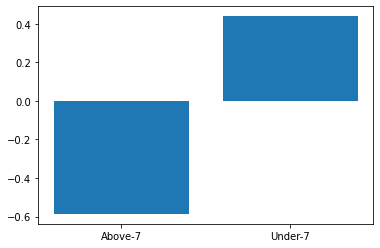

In [170]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석

# 학생들의 결석일 대비 성적 평균을 도식화한 것으로
# 결석일이 7일 이하인 학생들의 성적 평균이 7일 이상 결석한 학생들보다 높은 것을 알 수 있다.
gb = df.groupby('StudentAbsenceDays').mean()['Class_value']
plt.bar(gb.index, gb)

## 문제5. 모델 학습을 위한 데이터 전처리


### [문제5-1]  get_dummies()를 이용하여 범주형 데이터 전처리하기


In [226]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [301]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# ['ParentschoolSatisfaction', 'Class', 'Class_value'] 는 drop하여서 변수에서 제외

tmp = df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1)
dummy = pd.get_dummies(tmp)
# # X, y데이터 분리함
x = dummy
y = df['Class_value']

In [302]:
dummy.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran',
       'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW',
       'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq',
       'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia',
       'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine',
       'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis',
       'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela',
       'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel',
       'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 

### [문제5-2]  학습데이터와 테스트데이터 분리하기
- X_train, X_test, y_train, y_test 데이터셋 제작
- 테스트사이즈 0.3으로 분리/  같은 데이터셋을 추출할수 있도록  random번호 지정


In [303]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, sep='\n')

(336, 70)
(144, 70)
(336,)
(144,)


## [문제6]. Classification 모델 학습하기


### [문제6-1]. Logistic Regression 모델 생성/학습하기
- max_iter 옵션값 조정을 통해 학습성능 높이기

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [305]:
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)

LogisticRegression()

In [306]:
pr = model.predict(x_test[4:10])
pr, y_test[4:10]

(array([0, 0, 1, 0, 0, 0], dtype=int64),
 77     0
 161    0
 177    0
 155    1
 304    0
 476    0
 Name: Class_value, dtype: int64)

## [문제7]. 모델 학습 결과 평가하기
- Predict를 수행하고 classification_report() 결과 출력하기
- 혼돈행렬 시각화 하기

In [307]:
from sklearn.metrics import confusion_matrix
y_predict = model.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[35  3  1]
 [ 1 44 11]
 [ 0 10 39]]


In [308]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.97      0.90      0.93        39
           0       0.77      0.79      0.78        56
           1       0.76      0.80      0.78        49

    accuracy                           0.82       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.82      0.82      0.82       144



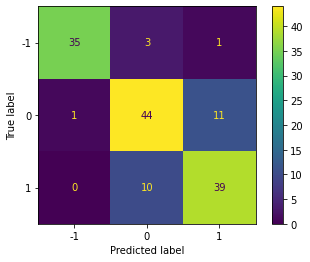

In [309]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

### 참고. Logistic Regression 모델 계수로 상관성 파악하기

In [297]:
model.classes_

array(['H', 'L', 'M'], dtype=object)

In [298]:
model.coef_.shape

(3, 70)

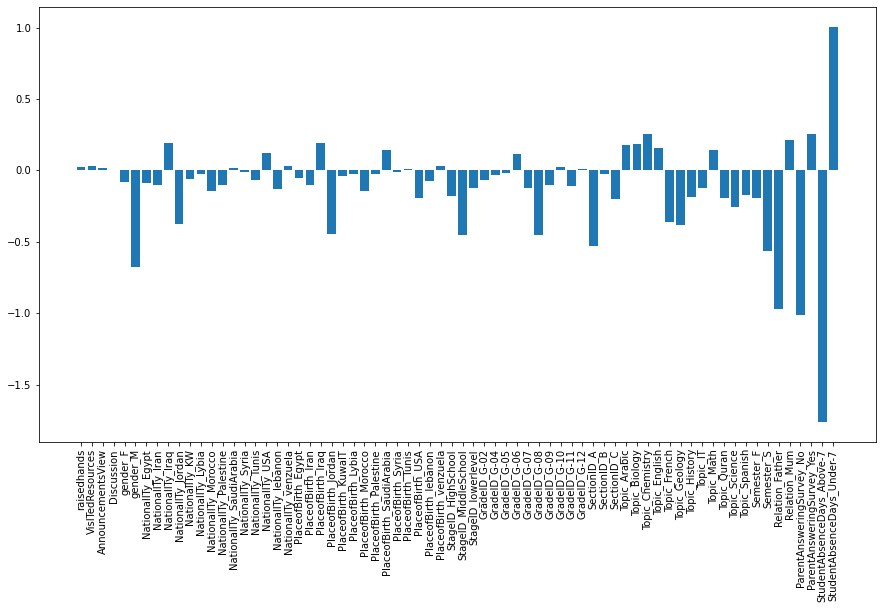

In [299]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(dummy.columns, model.coef_[0, :])
plt.xticks(rotation=90)
plt.show()

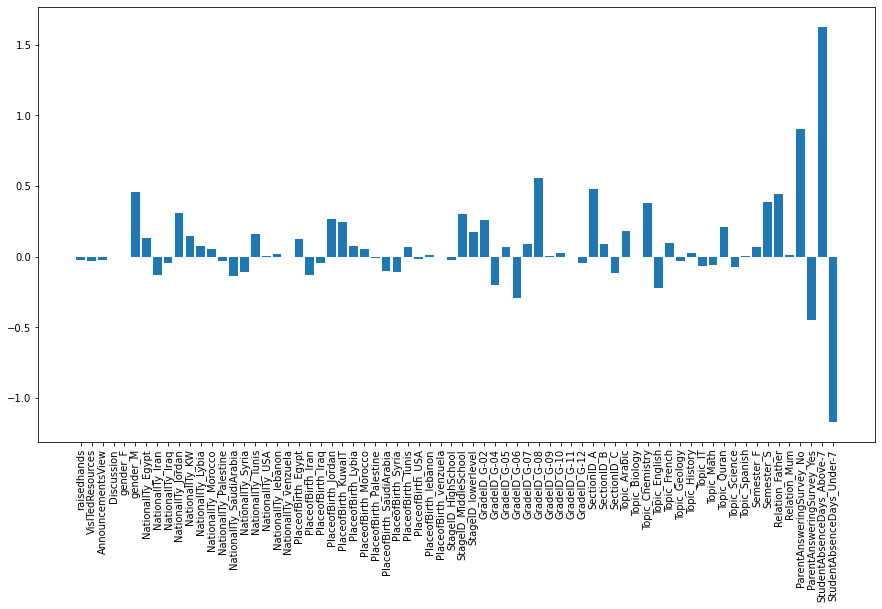

In [300]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(dummy.columns, model.coef_[1, :])
plt.xticks(rotation=90)
plt.show()

## [문제]. 의사결정트리 또는 랜덤 포레스트 모델로 학습하기

In [324]:
# 의사결정나무 학습
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0).fit(x_train, y_train)

In [325]:
confusion_matrix(y_test, tree.predict(x_test))

array([[30,  9,  0],
       [ 3, 41, 12],
       [ 1, 10, 38]], dtype=int64)

In [329]:
for i in range(1, 6):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i*5, random_state=0).fit(x_train, y_train)
    print('-'*5 + 'max_dept: ' + str(i*5) + '-'*5)
    print(confusion_matrix(y_test, tree.predict(x_test)))

-----max_dept: 5-----
[[33  6  0]
 [ 3 41 12]
 [ 1 17 31]]
-----max_dept: 10-----
[[31  8  0]
 [ 3 43 10]
 [ 1 13 35]]
-----max_dept: 15-----
[[30  9  0]
 [ 3 41 12]
 [ 1 10 38]]
-----max_dept: 20-----
[[30  9  0]
 [ 3 41 12]
 [ 1 10 38]]
-----max_dept: 25-----
[[30  9  0]
 [ 3 41 12]
 [ 1 10 38]]


In [322]:
# 랜덤포레스트 학습
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', max_depth = 15, random_state=0).fit(x_train, y_train)

In [323]:
confusion_matrix(y_test, forest.predict(x_test))

array([[33,  6,  0],
       [ 4, 45,  7],
       [ 0, 13, 36]], dtype=int64)

In [330]:
for i in range(1, 6):
    forest = RandomForestClassifier(criterion='entropy', max_depth = 15, random_state=0).fit(x_train, y_train)
    print('-'*5 + 'max_dept: ' + str(i*5) + '-'*5)
    print(confusion_matrix(y_test, forest.predict(x_test)))

-----max_dept: 5-----
[[33  6  0]
 [ 4 45  7]
 [ 0 13 36]]
-----max_dept: 10-----
[[33  6  0]
 [ 4 45  7]
 [ 0 13 36]]
-----max_dept: 15-----
[[33  6  0]
 [ 4 45  7]
 [ 0 13 36]]
-----max_dept: 20-----
[[33  6  0]
 [ 4 45  7]
 [ 0 13 36]]
-----max_dept: 25-----
[[33  6  0]
 [ 4 45  7]
 [ 0 13 36]]
